<a href="https://colab.research.google.com/github/2100030074/Anomaly-Detection-in-Network-Traffic-Using-ML-for-Cyber-Threat-Prevention-synthetic-network-traffic/blob/main/Anomaly_Detection_in_Network_Traffic_Using_Machine_Learning_for_Cyber_Threat_Prevention_synthetic_network_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort',
       'Protocol', 'BytesSent', 'BytesReceived', 'PacketsSent',
       'PacketsReceived', 'Duration', 'IsAnomaly'],
      dtype='object')


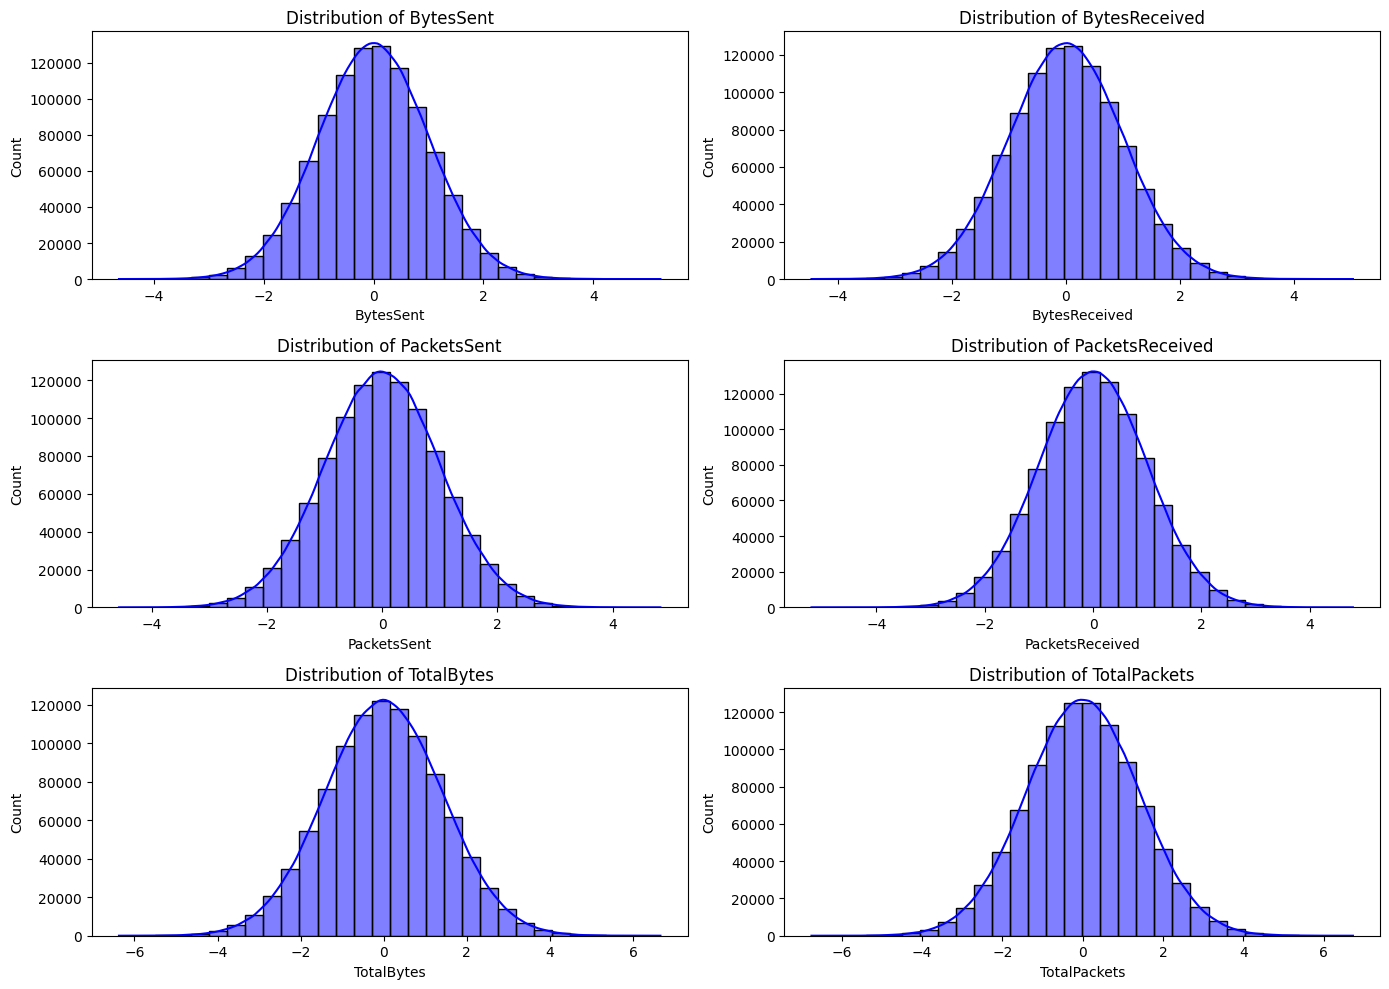

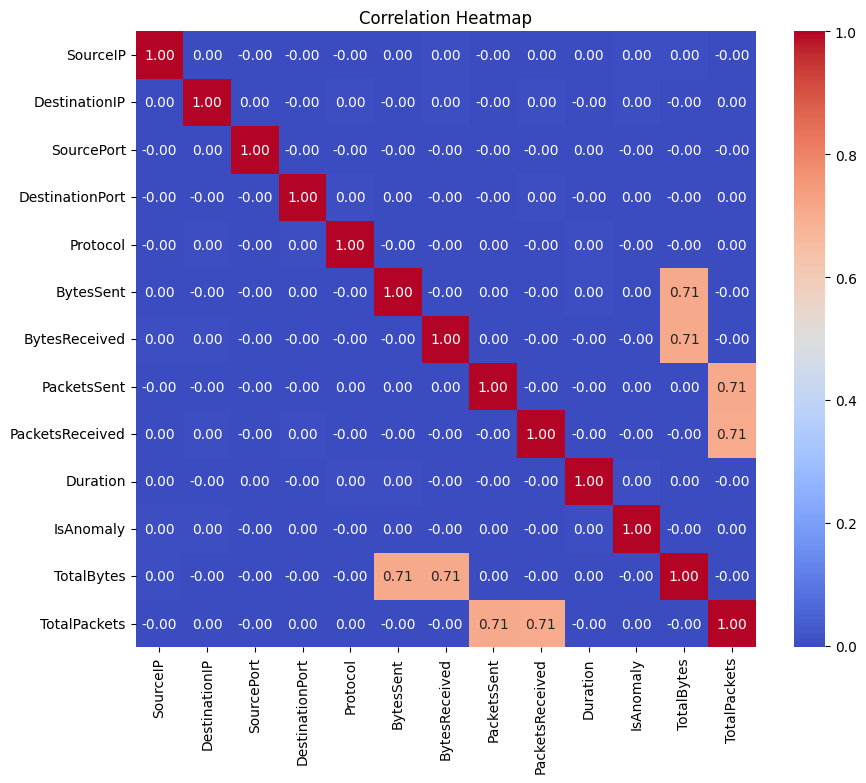

<ipython-input-4-d2f608c84346>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IsAnomaly', data=data, palette='Set2')


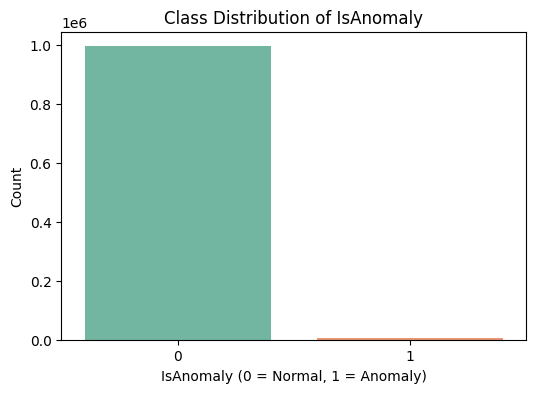

<ipython-input-4-d2f608c84346>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IsAnomaly', y='TotalBytes', data=data, palette='Set2')
<ipython-input-4-d2f608c84346>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IsAnomaly', y='TotalPackets', data=data, palette='Set3')


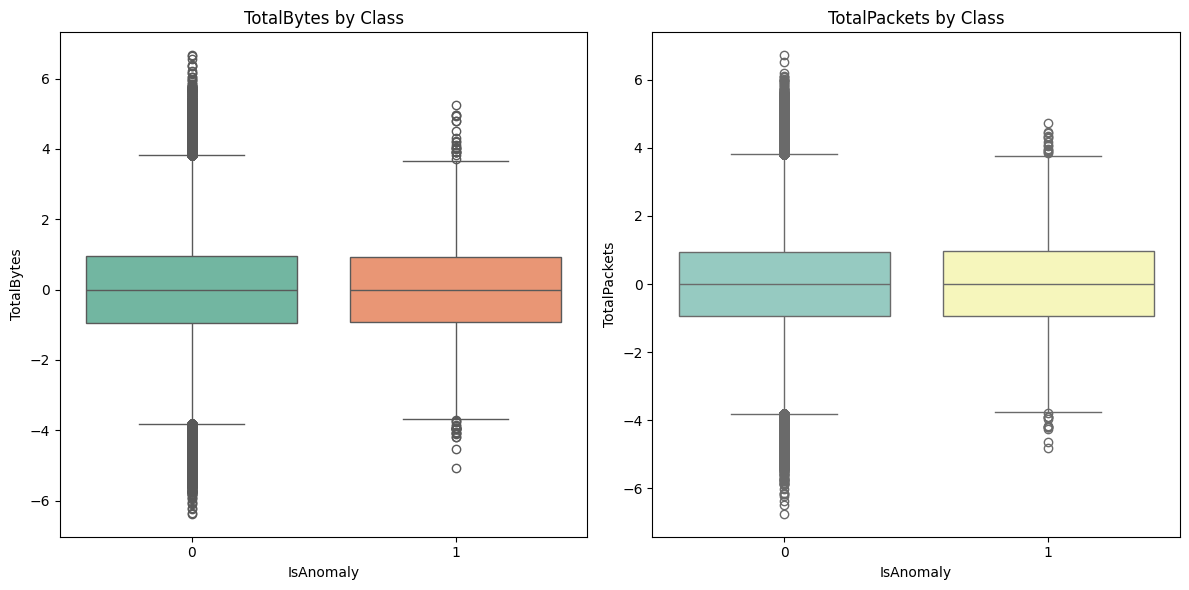

Epoch 1/5
21985/21985 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - accuracy: 0.9886 - loss: 0.0627 - val_accuracy: 0.9900 - val_loss: 0.0563
Epoch 2/5
21985/21985 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - accuracy: 0.9900 - loss: 0.0566 - val_accuracy: 0.9900 - val_loss: 0.0563
Epoch 3/5
21985/21985 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - accuracy: 0.9900 - loss: 0.0564 - val_accuracy: 0.9900 - val_loss: 0.0563
Epoch 4/5
21985/21985 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - accuracy: 0.9899 - loss: 0.0568 - val_accuracy: 0.9900 - val_loss: 0.0562
Epoch 5/5
21985/21985 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.9902 - loss: 0.0554 - val_accuracy: 0.9900 - val_loss: 0.0561
4711/4711 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
=== Isolation Forest Evaluation ===
Confusion Matrix:
[[134377  14914]
 [  1335    124]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94    149291
           1       0.01      0.08      0.02      1459

    accuracy        

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4711/4711 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step

Neural Network ROC-AUC: 0.5063


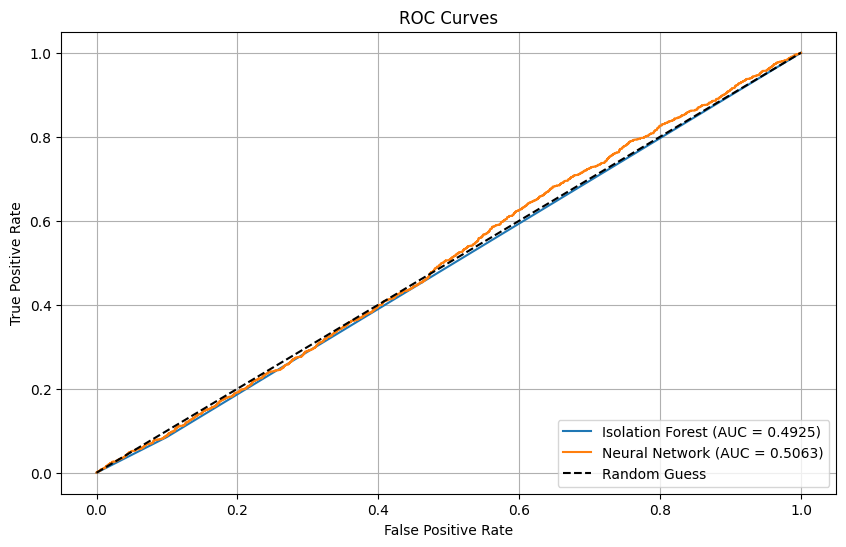

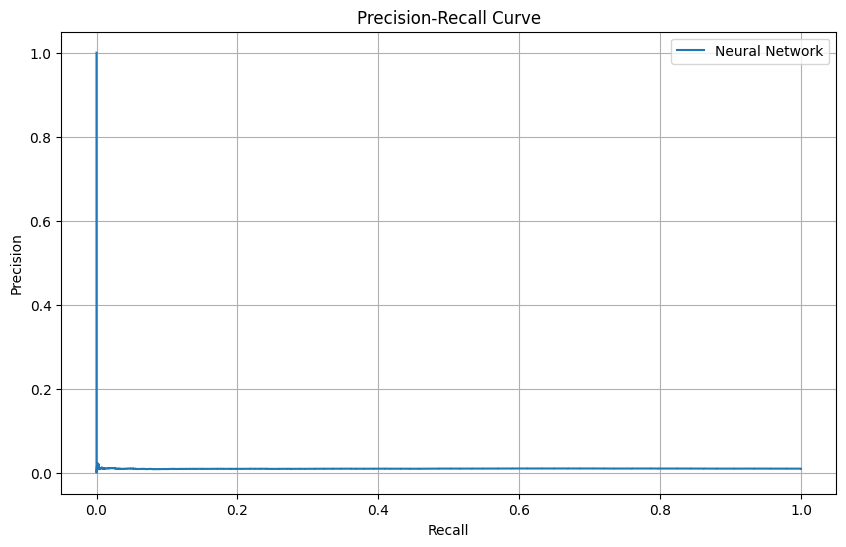

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
data = pd.read_csv("/content/synthetic_network_traffic.csv")
data.head()
data.count().isnull()
numerical_features = ['BytesSent', 'BytesReceived', 'PacketsSent', 'PacketsReceived', 'Duration']

print(data.columns)  # Ensure all column names are correct

data['TotalBytes'] = data['BytesSent'] + data['BytesReceived']
data['TotalPackets'] = data['PacketsSent'] + data['PacketsReceived']

# Data Distribution
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['BytesSent', 'BytesReceived', 'PacketsSent', 'PacketsReceived', 'TotalBytes', 'TotalPackets']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='IsAnomaly', data=data, palette='Set2')
plt.title('Class Distribution of IsAnomaly')
plt.xlabel('IsAnomaly (0 = Normal, 1 = Anomaly)')
plt.ylabel('Count')
plt.show()

# Bytes and Packets by Class
plt.figure(figsize=(12, 6))

# TotalBytes
plt.subplot(1, 2, 1)
sns.boxplot(x='IsAnomaly', y='TotalBytes', data=data, palette='Set2')
plt.title('TotalBytes by Class')

# TotalPackets
plt.subplot(1, 2, 2)
sns.boxplot(x='IsAnomaly', y='TotalPackets', data=data, palette='Set3')
plt.title('TotalPackets by Class')

plt.tight_layout()
plt.show()

data['TotalBytes'] = data['BytesSent'] + data['BytesReceived']
data['TotalPackets'] = data['PacketsSent'] + data['PacketsReceived']
anomaly_data = data[data['IsAnomaly'] == 1]
oversampled_data = pd.concat([data, anomaly_data], axis=0)
X = oversampled_data.drop(columns=['IsAnomaly'])  # Features
y = oversampled_data['IsAnomaly']  # Labels
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
isolation_forest.fit(X_train)
# Predict anomalies using the Isolation Forest
y_pred_iforest = isolation_forest.predict(X_test)
y_pred_iforest = (y_pred_iforest == -1)  # Convert -1 (anomaly) to 1, 1 (normal) to 0
# Create the deep learning model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, use 'sigmoid' for anomaly detection
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Apply threshold (adjust as needed)
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, precision_recall_curve

# Evaluate Isolation Forest
print("=== Isolation Forest Evaluation ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_iforest))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_iforest))

# Compute ROC-AUC for Isolation Forest
fpr_iforest, tpr_iforest, _ = roc_curve(y_test, y_pred_iforest)
roc_auc_iforest = auc(fpr_iforest, tpr_iforest)
print(f"\nIsolation Forest ROC-AUC: {roc_auc_iforest:.4f}")

# Evaluate Neural Network
print("\n=== Neural Network Evaluation ===")
y_pred_nn_prob = model.predict(X_test)  # Predicted probabilities for ROC-AUC
y_pred_nn = (y_pred_nn_prob > 0.5)  # Predicted labels

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))

# Compute ROC-AUC for Neural Network
print("\n=== Neural Network Evaluation ===")
y_pred_nn_prob = model.predict(X_test)  # Predicted probabilities for ROC-AUC

# Check for NaN values and replace with a suitable value (e.g., 0)
y_pred_nn_prob = np.nan_to_num(y_pred_nn_prob)

y_pred_nn = (y_pred_nn_prob > 0.5)  # Predicted labels

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn_prob) # This line was commented out
roc_auc_nn = auc(fpr_nn, tpr_nn) # This line was commented out
print(f"\nNeural Network ROC-AUC: {roc_auc_nn:.4f}")

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_iforest, tpr_iforest, label=f'Isolation Forest (AUC = {roc_auc_iforest:.4f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Plot Precision-Recall Curve for Neural Network
precision, recall, _ = precision_recall_curve(y_test, y_pred_nn_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Neural Network')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()